In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Us_Accident_Final.csv')

In [3]:
from sklearn import preprocessing 
categorical_columns = data.select_dtypes(include=['object','bool']).columns
categorical_columns
for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    data[i]= en.fit_transform(data[i])

In [4]:
train_y = data['Severity'].values
x_cols = [col for col in data.columns if col not in ['Severity'] if data[col].dtype=='float64'or data[col].dtype=='int64']
train_col= data[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 


In [5]:
train_col

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Day,Hour,Time_Diff,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,40.108910,-83.092860,40.112060,-83.031870,3.230,42.1,58.0,29.76,10.0,10.4,...,8,0,360.0,0,0,1,0,0,0,0
1,39.865420,-84.062800,39.865010,-84.048730,0.747,36.9,91.0,29.68,10.0,10.4,...,8,5,360.0,0,0,1,0,0,0,0
2,39.102660,-84.524680,39.102090,-84.523960,0.055,36.0,97.0,29.70,10.0,10.4,...,8,6,360.0,0,1,0,0,0,0,0
3,41.062130,-81.537840,41.062170,-81.535470,0.123,39.0,55.0,29.65,10.0,10.4,...,8,6,360.0,0,1,0,0,0,0,0
4,39.172393,-84.492792,39.170476,-84.501798,0.500,37.0,93.0,29.69,10.0,10.4,...,8,7,360.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587885,34.002480,-117.379360,33.998880,-117.370940,0.543,86.0,40.0,28.92,10.0,13.0,...,23,18,28.0,0,0,0,0,0,0,0
2587886,32.766960,-117.148060,32.765550,-117.153630,0.338,70.0,73.0,29.39,10.0,6.0,...,23,19,26.0,0,0,0,0,0,0,0
2587887,33.775450,-117.847790,33.777400,-117.857270,0.561,73.0,64.0,29.74,10.0,10.0,...,23,19,28.0,0,1,0,0,0,0,0
2587888,33.992460,-118.403020,33.983110,-118.395650,0.772,71.0,81.0,29.62,10.0,8.0,...,23,19,29.0,0,0,0,0,0,0,0


In [6]:
train_y

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)



In [ ]:

importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

X=data.drop('Severity',axis=1)
y=data['Severity']
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=12)


In [6]:
y.value_counts()

2    2305820
3     140693
4     117745
1      23632
Name: Severity, dtype: int64

In [5]:

train_index, test_index = next(sss.split(X, y))


In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2587890 entries, 0 to 2587889
Series name: Severity
Non-Null Count    Dtype
--------------    -----
2587890 non-null  int64
dtypes: int64(1)
memory usage: 19.7 MB


In [ ]:
X_train=data.iloc[train_index].drop('Severity',axis=1)
y_train=data.iloc[train_index].Severity
X_test=data.iloc[test_index].drop('Severity',axis=1)
y_test=data.iloc[test_index].Severity


Text(0.5, 1.0, 'Test Distribution')

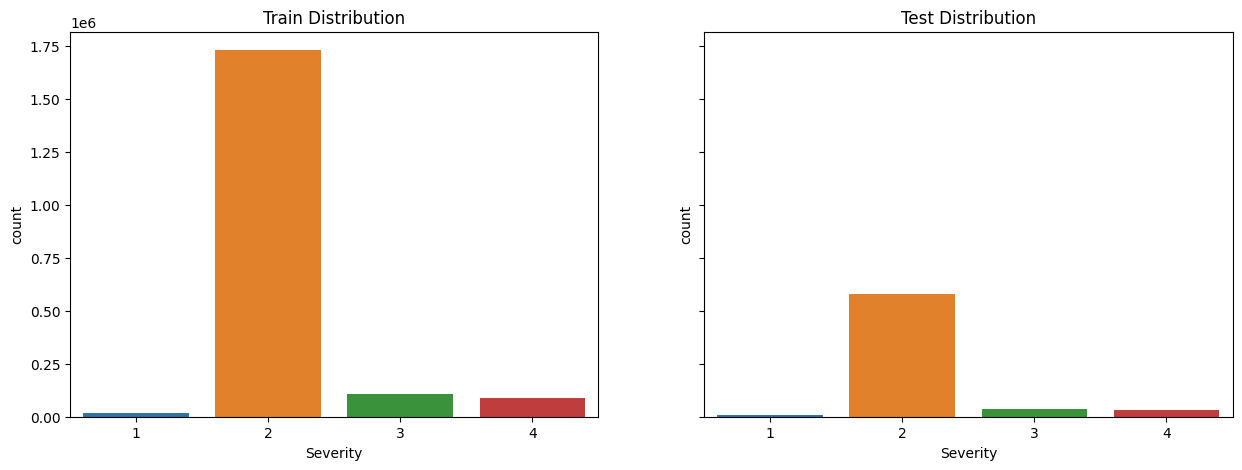

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.countplot(ax=axes[0],x=y_train)
axes[0].set_title('Train Distribution')
sns.countplot(ax=axes[1],x=y_test)
axes[1].set_title('Test Distribution')

In [22]:
from sklearn.preprocessing import StandardScaler
cols = X_train.columns
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 20)
X_kbest_features = chi2_features.fit_transform(dfscaled, yy)
chidata=pd.DataFrame(X_kbest_features)
chifeatures=[]
for i in chidata.columns:
    for j in dfscaled.columns:
        if (chidata[i]==dfscaled[j]).sum()==len(chidata):
            print(j)
            chifeatures.append(j)

Start_Lat
Start_Lng
End_Lat
End_Lng
Street
State
Zipcode
Timezone
Weather_Condition
Crossing
Junction
Traffic_Signal
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Precipitation_NA
Month
Clear
Cloud


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(dfscaled, yy)
chidata=pd.DataFrame(X_kbest_features)
chifeatures10=[]
for i in chidata.columns:
    for j in dfscaled.columns:
        if (chidata[i]==dfscaled[j]).sum()==len(chidata):
            print(j)
            chifeatures10.append(j)

Start_Lng
End_Lng
State
Timezone
Crossing
Junction
Traffic_Signal
Precipitation_NA
Month
Clear


In [50]:
indices = np.argsort(importance)[::-1][:10]
fimport=list(fearture_name[indices])
fimport

['Start_Lng',
 'End_Lng',
 'Distance(mi)',
 'Time_Diff',
 'Precipitation_NA',
 'Start_Lat',
 'End_Lat',
 'Hour',
 'Pressure(in)',
 'Month']

## Training Models

####  Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score
def evall(predict,real):
    acc=accuracy_score(predict,real)
    bacc=balanced_accuracy_score(predict,real)
    f1=f1_score(predict,real,average='macro')
    print('Accuracy is : ',acc,'\nBalanced Accuracy is : ',bacc,'\nMacro Average f1 is :',f1)


In [31]:
def classprecision(y_test,y_pred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    for i in y_test.unique():
        realclassi=y_test==i
        preclassi=y_pred==i
        precision = precision_score(realclassi, preclassi)
        recall = recall_score(realclassi, preclassi)
        print('Class: ',i,"Precision : ",precision)

#### Decision tree

In [39]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf = clf.fit(X_train[chifeatures10], y_train)

In [40]:
y_pred=clf.predict(X_test[chifeatures10])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.8740828442608888 
Balanced Accuracy is :  0.5479439318373007 
Macro Average f1 is : 0.5406140354348266
Class:  2 Precision :  0.9335860754528537
Class:  3 Precision :  0.3451525503592885
Class:  4 Precision :  0.36840182648401826
Class:  1 Precision :  0.49386104290047667


In [44]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train[fimport], y_train)

DecisionTreeClassifier()

In [46]:
y_pred=clf.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.8907713304882893 
Balanced Accuracy is :  0.6303107156110119 
Macro Average f1 is : 0.6236392508392972
Class:  2 Precision :  0.948901449300684
Class:  3 Precision :  0.42511252101296026
Class:  4 Precision :  0.42601150617749695
Class:  1 Precision :  0.6696985009263938


-# Gussian Naive Bays

In [45]:
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()
#gnb.fit(X_train[fimport], y_train)
#y_pred = gnb.predict(X_test[fimport])
#evall(y_test,y_pred)
#classprecision(y_test,y_pred)

#### MLP 

In [63]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1, verbose=True)
mlpc.fit(X_train[fimport], y_train)

Iteration 1, loss = 0.54400614
Iteration 2, loss = 0.43854136
Iteration 3, loss = 0.41463584
Iteration 4, loss = 0.40524223
Iteration 5, loss = 0.39965505
Iteration 6, loss = 0.39500897
Iteration 7, loss = 0.39102232
Iteration 8, loss = 0.38778506
Iteration 9, loss = 0.38495690
Iteration 10, loss = 0.38282787
Iteration 11, loss = 0.38077467
Iteration 12, loss = 0.37908715
Iteration 13, loss = 0.37745021
Iteration 14, loss = 0.37600080
Iteration 15, loss = 0.37471226
Iteration 16, loss = 0.37314793
Iteration 17, loss = 0.37193915
Iteration 18, loss = 0.37037164
Iteration 19, loss = 0.36861534
Iteration 20, loss = 0.36698935
Iteration 21, loss = 0.36583439
Iteration 22, loss = 0.36424885
Iteration 23, loss = 0.36190144
Iteration 24, loss = 0.35985690
Iteration 25, loss = 0.35787807
Iteration 26, loss = 0.35633604
Iteration 27, loss = 0.35522504
Iteration 28, loss = 0.35371778
Iteration 29, loss = 0.35256085
Iteration 30, loss = 0.35122881
Iteration 31, loss = 0.35014407
Iteration 32, los

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), random_state=1,
              verbose=True)

In [64]:
y_pred = mlpc.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.8913736476043277 
Balanced Accuracy is :  0.29895028929564016 
Macro Average f1 is : 0.3232010693894619
Class:  2 Precision :  0.8972626218108809
Class:  1 Precision :  0.5
Class:  3 Precision :  0.42613636363636365
Class:  4 Precision :  0.5492957746478874


- oh no MLP is bad :(

In [65]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(30, 30), random_state=1, verbose=True)
mlpc.fit(X_train[fimport], y_train)

Iteration 1, loss = 0.69596956
Iteration 2, loss = 0.43669500
Iteration 3, loss = 0.41357788
Iteration 4, loss = 0.39932299
Iteration 5, loss = 0.38891797
Iteration 6, loss = 0.38175197
Iteration 7, loss = 0.37620266
Iteration 8, loss = 0.37233907
Iteration 9, loss = 0.36988511
Iteration 10, loss = 0.36743915
Iteration 11, loss = 0.36469956
Iteration 12, loss = 0.36314251
Iteration 13, loss = 0.36103025
Iteration 14, loss = 0.35944693
Iteration 15, loss = 0.35780273
Iteration 16, loss = 0.35587415
Iteration 17, loss = 0.35438678
Iteration 18, loss = 0.35257926
Iteration 19, loss = 0.35110039
Iteration 20, loss = 0.34975102
Iteration 21, loss = 0.34843100
Iteration 22, loss = 0.34737406
Iteration 23, loss = 0.34617722
Iteration 24, loss = 0.34460053
Iteration 25, loss = 0.34374866
Iteration 26, loss = 0.34241075
Iteration 27, loss = 0.34176981
Iteration 28, loss = 0.34118779
Iteration 29, loss = 0.33948619
Iteration 30, loss = 0.33831955
Iteration 31, loss = 0.33847867
Iteration 32, los

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 30), random_state=1,
              verbose=True)

In [66]:
y_pred = mlpc.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.8997295208655333 
Balanced Accuracy is :  0.4080711473450494 
Macro Average f1 is : 0.47238020059921365
Class:  2 Precision :  0.9107392607392607
Class:  1 Precision :  0.810126582278481
Class:  3 Precision :  0.5262008733624454
Class:  4 Precision :  0.6122448979591837


In [68]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100), random_state=1, verbose=True)
mlpc.fit(X_train[fimport], y_train)

Iteration 1, loss = 0.60625593
Iteration 2, loss = 0.39256324
Iteration 3, loss = 0.37920125
Iteration 4, loss = 0.37291766
Iteration 5, loss = 0.36584102
Iteration 6, loss = 0.36297143
Iteration 7, loss = 0.35792545
Iteration 8, loss = 0.35534265
Iteration 9, loss = 0.35132430
Iteration 10, loss = 0.34801070
Iteration 11, loss = 0.34560106
Iteration 12, loss = 0.34206316
Iteration 13, loss = 0.34151343
Iteration 14, loss = 0.33581083
Iteration 15, loss = 0.33553413
Iteration 16, loss = 0.33055181
Iteration 17, loss = 0.32893826
Iteration 18, loss = 0.32523626
Iteration 19, loss = 0.32423624
Iteration 20, loss = 0.32251963
Iteration 21, loss = 0.31938664
Iteration 22, loss = 0.31882987
Iteration 23, loss = 0.31386751
Iteration 24, loss = 0.31387034
Iteration 25, loss = 0.31329763
Iteration 26, loss = 0.30966293
Iteration 27, loss = 0.30989399
Iteration 28, loss = 0.30865510
Iteration 29, loss = 0.30434895
Iteration 30, loss = 0.30439345
Iteration 31, loss = 0.30389228
Iteration 32, los

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100), random_state=1,
              verbose=True)

In [69]:
y_pred = mlpc.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.9136398763523956 
Balanced Accuracy is :  0.5521111882572369 
Macro Average f1 is : 0.6073517728630994
Class:  2 Precision :  0.9295009734603955
Class:  1 Precision :  0.6666666666666666
Class:  3 Precision :  0.664983164983165
Class:  4 Precision :  0.6294536817102138


- oh i MLP is the best 
- lets just get bigger

In [67]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(300, 300), random_state=1, verbose=True)
mlpc.fit(X_train[fimport], y_train)

Iteration 1, loss = 0.43968054
Iteration 2, loss = 0.37057959
Iteration 3, loss = 0.36144045
Iteration 4, loss = 0.35149266
Iteration 5, loss = 0.34229671
Iteration 6, loss = 0.33536777
Iteration 7, loss = 0.33046355
Iteration 8, loss = 0.32482821
Iteration 9, loss = 0.31952711
Iteration 10, loss = 0.31584365
Iteration 11, loss = 0.31469009
Iteration 12, loss = 0.31126450
Iteration 13, loss = 0.30980615
Iteration 14, loss = 0.30314495
Iteration 15, loss = 0.30189098
Iteration 16, loss = 0.30004660
Iteration 17, loss = 0.29653564
Iteration 18, loss = 0.29566394
Iteration 19, loss = 0.29442280
Iteration 20, loss = 0.29344293
Iteration 21, loss = 0.28956213
Iteration 22, loss = 0.28819850
Iteration 23, loss = 0.28744524
Iteration 24, loss = 0.28212840
Iteration 25, loss = 0.28316962
Iteration 26, loss = 0.28188519
Iteration 27, loss = 0.27962945
Iteration 28, loss = 0.28124048
Iteration 29, loss = 0.27579359
Iteration 30, loss = 0.27355369
Iteration 31, loss = 0.27360513
Iteration 32, los

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(500, 500), random_state=1,
              verbose=True)

In [61]:
y_pred = mlpc.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.9136398763523956 
Balanced Accuracy is :  0.5521111882572369 
Macro Average f1 is : 0.6073517728630994
Class:  2 Precision :  0.9295009734603955
Class:  1 Precision :  0.6666666666666666
Class:  3 Precision :  0.664983164983165
Class:  4 Precision :  0.6294536817102138


## Hyper Parameters

#### Decision Tree

In [70]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5 , 7, 10, 15],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

In [73]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "accuracy")

In [74]:
%%time
grid_search.fit(X_train[fimport], y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 203 ms
Wall time: 3.76 s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='accuracy', verbose=1)

In [75]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
2,0.047038,0.002090,0.006713,1.131892e-03,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.891210,0.889868,0.890539,0.000671,1
17,0.094556,0.001822,0.005783,1.072884e-03,entropy,7,20,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.893142,0.887936,0.890539,0.002603,2
16,0.093323,0.004490,0.002493,4.988909e-04,entropy,7,10,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.889278,0.889627,0.889452,0.000174,3
0,0.043047,0.000997,0.002992,3.576279e-07,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.890606,0.887212,0.888909,0.001697,4
14,0.075509,0.005963,0.003136,1.442432e-04,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.889761,0.887936,0.888849,0.000912,5


#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier()

In [77]:
parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,50,50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

In [92]:
grid_search1 = GridSearchCV(estimator=mlpc, 
                           param_grid=parameter_space, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "f1_micro")

In [93]:
#%%time
grid_search1.fit(X_train[fimport], y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Iteration 1, loss = 0.96511636
Iteration 2, loss = 0.47914113
Iteration 3, loss = 0.43056592
Iteration 4, loss = 0.41931102
Iteration 5, loss = 0.41378411
Iteration 6, loss = 0.41007481
Iteration 7, loss = 0.40732401
Iteration 8, loss = 0.40515490
Iteration 9, loss = 0.40334850
Iteration 10, loss = 0.40183008
Iteration 11, loss = 0.40057477
Iteration 12, loss = 0.39946153
Iteration 13, loss = 0.39854205
Iteration 14, loss = 0.39765525
Iteration 15, loss = 0.39687724
Iteration 16, loss = 0.39611714
Iteration 17, loss = 0.39552484
Iteration 18, loss = 0.39489614
Iteration 19, loss = 0.39431598
Iteration 20, loss = 0.39376685
Iteration 21, loss = 0.39327883
Iteration 22, loss = 0.39278892
Iteration 23, loss = 0.39234421
Iteration 24, loss = 0.39193201
Iteration 25, loss = 0.39152058
Iteration 26, loss = 0.39113368
Iteration 27, loss = 0.39074292
Iteration 28, loss = 0.39036656
Iteration 29, loss = 0.39003246
Iteration 30, loss = 0.38967341
Iteration 31, loss = 0.38934375
Iteration 32, los

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100),
                                     random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50), (50, 50, 50),
                                                (100, 100)],
                         'solver': ['sgd', 'adam']},
             scoring='f1', verbose=1)

In [94]:
score_df = pd.DataFrame(grid_search1.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,19.472585,2.337030,0.115890,0.077635,tanh,"(50, 50)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,1
1,21.789087,0.642752,0.039509,0.001926,tanh,"(50, 50)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,1
2,25.327352,0.927435,0.055820,0.007980,tanh,"(50, 50, 50)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,1
3,35.648804,0.302272,0.043400,0.001001,tanh,"(50, 50, 50)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,1
4,32.086115,2.019690,0.056951,0.005936,tanh,"(100, 100)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,1


In [95]:
best_ml = grid_search1.best_estimator_

In [96]:
y_pred = best_ml.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.8912287480680062 
Balanced Accuracy is :  0.2657018148942777 
Macro Average f1 is : 0.2661619449958359
Class:  2 Precision :  0.8924121212121212
Class:  1 Precision :  1.0
Class:  3 Precision :  0.625
Class:  4 Precision :  0.5522388059701493


## Rule Extraction
- DT


In [97]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train[fimport], y_train)

DecisionTreeClassifier(max_depth=7)

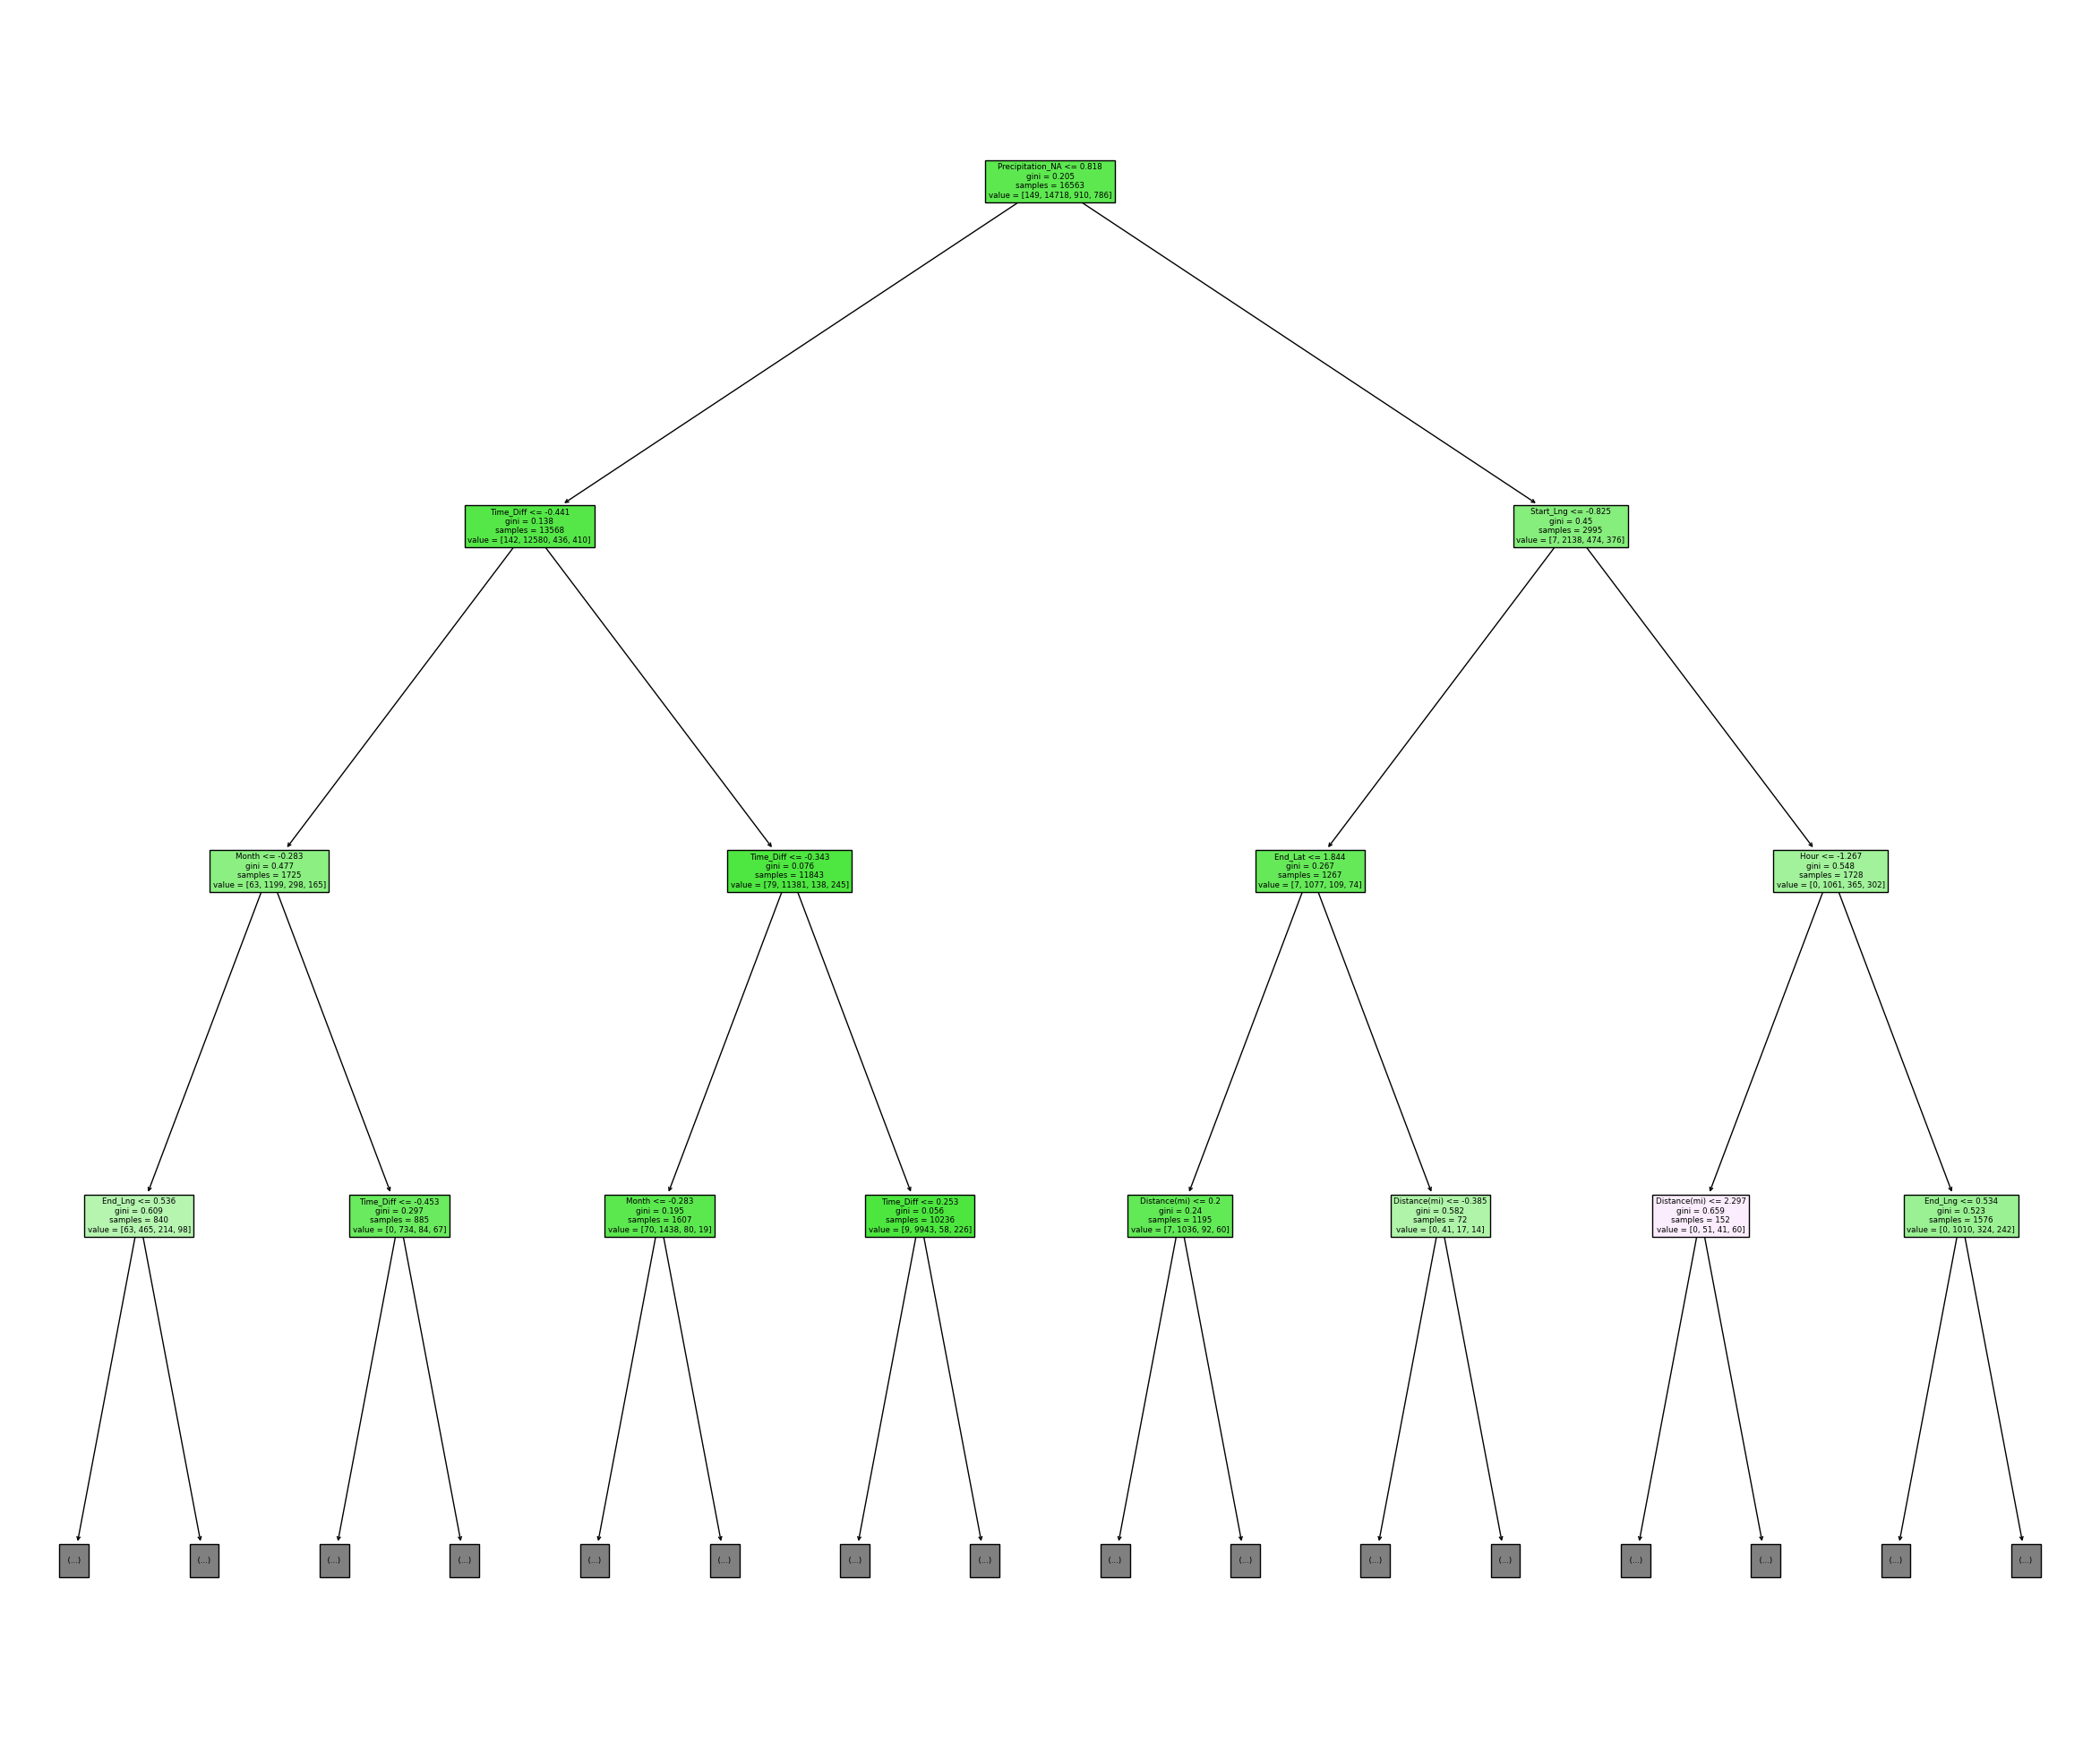

In [98]:
from sklearn.tree import plot_tree, export_text
fig = plt.figure(figsize=(30,25))
plot_tree(clf, feature_names=fimport, max_depth=3, filled=True);

In [99]:
y_pred = clf.predict(X_test[fimport])
evall(y_test,y_pred)
classprecision(y_test,y_pred)

Accuracy is :  0.9014200154559505 
Balanced Accuracy is :  0.4459064176484051 
Macro Average f1 is : 0.5090749107711806
Class:  2 Precision :  0.9167171105730427
Class:  1 Precision :  0.6936936936936937
Class:  3 Precision :  0.5595238095238095
Class:  4 Precision :  0.5100286532951289


In [100]:
from sklearn import tree
text_representation = tree.export_text(clf)
text_representation = tree.export_text(clf, feature_names=fimport)
print(text_representation)

|--- Precipitation_NA <= 0.82
|   |--- Time_Diff <= -0.44
|   |   |--- Month <= -0.28
|   |   |   |--- End_Lng <= 0.54
|   |   |   |   |--- End_Lng <= -0.85
|   |   |   |   |   |--- Distance(mi) <= -0.44
|   |   |   |   |   |   |--- End_Lng <= -1.23
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- End_Lng >  -1.23
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Distance(mi) >  -0.44
|   |   |   |   |   |   |--- Pressure(in) <= -1.40
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Pressure(in) >  -1.40
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- End_Lng >  -0.85
|   |   |   |   |   |--- Time_Diff <= -0.44
|   |   |   |   |   |   |--- Time_Diff <= -0.49
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- Time_Diff >  -0.49
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Time_Diff >  -0.44
|   |   |   |   |   |   |--- Start_Lat <= 0.56
|   |   |   |   |   |   |   |--- c

In [101]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [104]:
rules = get_rules(clf, fimport, [1,2,3,4])
for r in rules:
    print(r)
    print('\n')

if (Precipitation_NA <= 0.818) and (Time_Diff > -0.441) and (Time_Diff > -0.343) and (Time_Diff <= 0.253) and (Start_Lng <= 0.075) and (Pressure(in) <= 1.326) and (Distance(mi) <= 10.473) then class: 2 (proba: 99.42%) | based on 3,644 samples


if (Precipitation_NA <= 0.818) and (Time_Diff > -0.441) and (Time_Diff > -0.343) and (Time_Diff <= 0.253) and (Start_Lng > 0.075) and (Start_Lat > -1.027) and (Start_Lat > -1.026) then class: 2 (proba: 96.44%) | based on 3,510 samples


if (Precipitation_NA <= 0.818) and (Time_Diff > -0.441) and (Time_Diff > -0.343) and (Time_Diff <= 0.253) and (Start_Lng > 0.075) and (Start_Lat <= -1.027) and (Distance(mi) <= 2.374) then class: 2 (proba: 99.62%) | based on 1,562 samples


if (Precipitation_NA <= 0.818) and (Time_Diff > -0.441) and (Time_Diff > -0.343) and (Time_Diff > 0.253) and (Time_Diff > 0.516) and (Hour > -1.957) and (Time_Diff <= 10.164) then class: 2 (proba: 98.58%) | based on 846 samples


if (Precipitation_NA <= 0.818) and (Time_Diff >